Fourier series

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma
%matplotlib inline

In [5]:
x = np.linspace(-2*np.pi,2*np.pi,1000)

In [10]:
2j

2j

/Users/mglerner/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


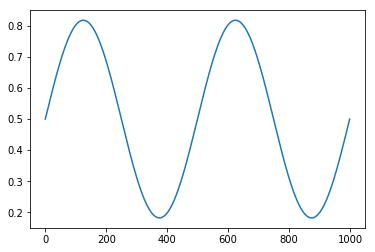

In [9]:
plt.plot((1/2) + 1/(np.pi*1j)*(np.exp(1j*x) + np.exp(-1j*np.pi)/(-1)))

Can we use range for this?

In [11]:
print(list(range(-2,2)))

[-2, -1, 0, 1]


so we need range(-N,N+1)

In [15]:
def plotN(N):
    y = np.zeros_like(x)
    for n in range(-N,N+1):
        if n == 0:
            y = y + 1/2
        else:
            y = y + (1/(1j*np.pi))*(np.exp(n*1j*x))/n
    plt.plot(x,y)

/Users/mglerner/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


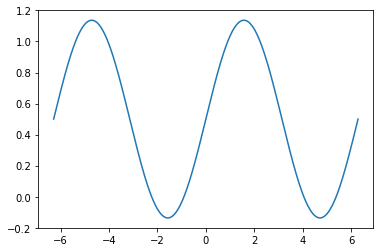

In [17]:
plotN(1)

/Users/mglerner/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


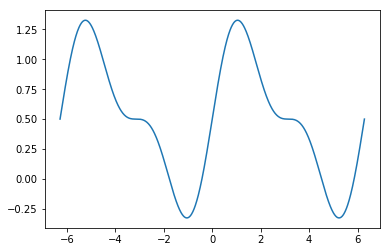

In [18]:
plotN(2)

/Users/mglerner/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


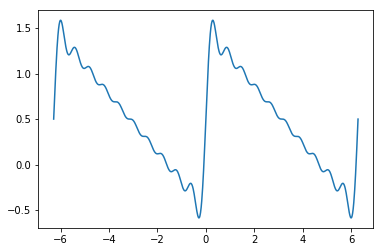

In [19]:
plotN(10)

Well that doesn't look right. Oh, because we included all of the terms, when we really just wanted the odd terms.

For that, we need "divmod" to see if things are even or odd ... or we could just step through every other term:

In [21]:
print(list(range(0,10,2)))

[0, 2, 4, 6, 8]


In [22]:
print(list(range(1,10,2)))

[1, 3, 5, 7, 9]


Although that's a bit tough if we don't know whether we're starting with an even number or an odd number.

So, divmod, which we'll talk about:

In [23]:
for i in range(10):
    print(i,divmod(i,2))

0 (0, 0)
1 (0, 1)
2 (1, 0)
3 (1, 1)
4 (2, 0)
5 (2, 1)
6 (3, 0)
7 (3, 1)
8 (4, 0)
9 (4, 1)


It's like division: "two goes into 0 zero times with a remainder of 0. two goes into 1 zero times with a remainder of 1. ..."

In [24]:
for i in range(10):
    div,mod = divmod(i,2)
    print(f'2 goes into {i} {div} times with a remainder of {mod}')

2 goes into 0 0 times with a remainder of 0
2 goes into 1 0 times with a remainder of 1
2 goes into 2 1 times with a remainder of 0
2 goes into 3 1 times with a remainder of 1
2 goes into 4 2 times with a remainder of 0
2 goes into 5 2 times with a remainder of 1
2 goes into 6 3 times with a remainder of 0
2 goes into 7 3 times with a remainder of 1
2 goes into 8 4 times with a remainder of 0
2 goes into 9 4 times with a remainder of 1


And, any time we have a remainder of 0, it's an even number. A remainder of 1 is odd.

In [27]:
def plotN(N):
    y = np.zeros_like(x)
    for n in range(-N,N+1):
        if n == 0:
            y = y + 1/2
        else:
            div,mod = divmod(n,2)
            if mod == 0:
                y = y + 0
            else:
                y = y + (1/(1j*np.pi))*(np.exp(n*1j*x))/n
    plt.plot(x,y)

/Users/mglerner/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


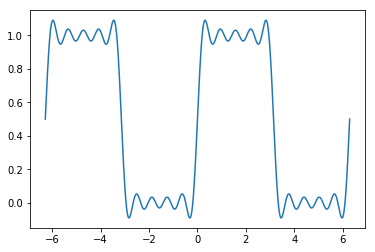

In [28]:
plotN(10)

In [30]:
from ipywidgets import interact

In [31]:
interact(plotN,N=(0,40))

interactive(children=(IntSlider(value=20, description='N', max=40), Output()), _dom_classes=('widget-interact',))

<function __main__.plotN>